In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd

In [45]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

from flask import Flask, jsonify

In [47]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [48]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [49]:
# We can view all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [50]:
# Save references to each table
hawaii_measurement = Base.classes.measurement
hawaii_station = Base.classes.station

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
             
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
precipitation_info =(hawaii_measurement.date, hawaii_measurement.prcp)

precipitation_df = session.query(*precipitation_info).\
    filter(hawaii_measurement.date >= year_ago).all()

precipitation_df    

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [62]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_results=pd.DataFrame(precipitation_df, columns=['Date', 'Precipitation'])
precipitation_results.head()

# Sort the dataframe by date
precipitation_results.set_index('Date', inplace=True)
preci_df = precipitation_results.sort_index()

preci_df.head()



,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


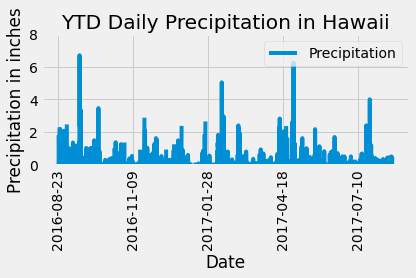

In [69]:
#Use Pandas Plotting with Matplotlib to plot the data
ax = preci_df.plot(rot=90)
ax.set_title("YTD Daily Precipitation in Hawaii")
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation in inches")
ax.set_ylim(bottom=0, top=8)
ax.legend(loc='upper right')

# Save the figure
plt.tight_layout()
plt.savefig("Images/precipitation.png")
plt.show()

In [55]:
# Use Pandas to calcualte the summary statistics for the precipitation data
preci_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [56]:
# Design a query to show how many stations are available in this dataset?

station_info =(hawaii_station.station)

station_info_df = session.query(func.count(station_info)).all()
    
station_info_df

[(9)]

In [74]:
# What are the most active stations? (i.e. what stations have the most rows)?
#List the stations and the counts in descending order.
station_info =(hawaii_measurement.station)

station_info_df = session.query(station_info, func.count(station_info)).\
    group_by(station_info).order_by(func.count(station_info).desc()).all()
    
    
station_info_df

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(hawaii_measurement.tobs), func.max(hawaii_measurement.tobs), func.avg(hawaii_measurement.tobs)).\
             filter(hawaii_measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'USC00519281')

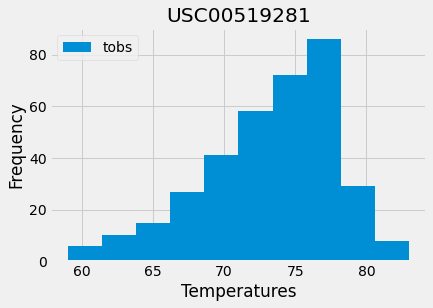

In [84]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago


most_active=session.query(hawaii_measurement.tobs).\
    filter(hawaii_measurement.date >= year_ago).\
    filter(hawaii_measurement.station == 'USC00519281').all()

tobs_most_active=pd.DataFrame(most_active, columns=['tobs'])

tobs_most_active

tobs_most_active.plot.hist()
plt.xlabel('Temperatures')
plt.title('USC00519281')


## Bonus Challenge Assignment

In [86]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(hawaii_measurement.tobs), func.avg(hawaii_measurement.tobs), func.max(hawaii_measurement.tobs)).\
        filter(hawaii_measurement.date >= start_date).filter(hawaii_measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
